# Werkzeuge der Visualisierung

$$
 \cite{lin1973}
$$
> -- <cite>Benjamin Franklin</cite>


> The secret to creativity is knowing how to hide your sources. 
> -- <cite>[Albert Einstein][1]</cite>

[1]:http://www.quotedb.com/quotes/2112

In [ ]:
# Init libraries
install.packages("lmtest", repos="https://cran.wu.ac.at/")
install.packages("vcd", repos="https://cran.wu.ac.at/")
install.packages("ggplot2", repos="https://cran.wu.ac.at/")
install.packages("stablelearner", repos="https://cran.wu.ac.at/")
library(vcd)
library(ggplot2)

In [95]:
# Load dataset
#ti <- read.csv("../datasets/titanic.csv", header = TRUE, sep=",")
#ti$Who <- "NA"
#ti$Who[ti$Sex=="male"] <- "man"
#ti$Who[ti$Sex=="female"] <- "woman"
#ti$Who[ti$Age<18] <- "child"
# Titanic filtered
#ti <- ti[!(is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked=="" | is.na(ti$PassengerId) | is.na(ti$Survived) |
#           is.na(ti$Pclass) |  ti$Ticket=="Name" |is.na(ti$Age) | ti$Ticket=="" | ti$Sex=="" ), ]
# Full titanic dataset: https://rdrr.io/cran/stablelearner/man/titanic.html
# Includes crew, which is needed or the simpson paradoxon
data("titanic", package = "stablelearner")
ti <- titanic

ti$who <- "NA"
ti$sex=ti$gender
ti$who[ti$sex=="male"] <- "man"
ti$who[ti$sex=="female"] <- "woman"
ti$who[ti$age<18] <- "child"
#ti <- ti[!( ti$name=="" | ti$gender=="" | is.na(ti$age) | ti$class=="" | ti$embarked=="" |
#           ti$survived=="" | ti$country=="" | is.na(ti$ticketno) | is.na(ti$fare) | 
#           is.na(ti$sibsp) | is.na(ti$parch)), ]
ti <- ti[!( ti$class=="" | ti$survived==""),]
#ti <- ti[!(is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked=="" | is.na(ti$PassengerId) | is.na(ti$survived) |
#           is.na(ti$Pclass) |  ti$Ticket=="Name" |is.na(ti$age) | ti$ticketno=="" | ti$gender=="" ), ]

kek <- ti[(ti$class=="restaurant staff"), ]
kek

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived,who,sex
1326,"Allaria, Sig. Battista Antonio",male,22,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1340,"Aspeslagh, Mr. Georges",male,26,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1351,"Banfi, Sig. Ugo",male,24,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1368,"Basilico, Sig. Giovanni",male,27,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1371,"Bazzi, Sig. Narciso",male,33,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1383,"Bernardi, Sig. Battista",male,22,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1387,"Beux, Mr. David",male,26,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1390,"Bietrix, Mr. George Baptiste",male,28,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1404,"Blumet, Mr. Jean Baptiste",male,26,restaurant staff,S,England,NA,NA,NA,NA,no,man,male
1406,"Bochet, Mr. Pierre Giuseppe",male,43,restaurant staff,S,England,NA,NA,NA,NA,no,man,male


#### 1. Lade den Datensatz Titanic in R. Beschreibe die Daten anhand der internen Hilfe (hilfreiche R Befehle: ?, help() )
 

In [50]:
help(ti)
str(ti)


'data.frame':	0 obs. of  13 variables:
 $ name    : chr 
 $ gender  : Factor w/ 2 levels "female","male": 
 $ age     : num 
 $ class   : Factor w/ 7 levels "1st","2nd","3rd",..: 
 $ embarked: Factor w/ 4 levels "B","C","Q","S": 
 $ country : Factor w/ 48 levels "Argentina","Australia",..: 
 $ ticketno: int 
 $ fare    : num 
 $ sibsp   : Ord.factor w/ 9 levels "0"<"1"<"2"<"3"<..: 
 $ parch   : Ord.factor w/ 10 levels "0"<"1"<"2"<"3"<..: 
 $ survived: Factor w/ 2 levels "no","yes": 
 $ who     : chr 
 $ sex     : Factor w/ 2 levels "female","male": 


No documentation for 'ti' in specified packages and libraries:
you could try '??ti'

#### 2. Untersuche den Titanic Datensatz mithilfe von Tabellen von absoluten und relativen Häufigkeiten der Ränder heruntergebrochen auf je 2 oder 3 Dimensionen von Variablen. (hilfreiche R Befehle: table(), ftable(), colSums, rowSums(), apply(), xtable())

In [43]:
invisible(table(ti$age, ti$fare))

#### 3. Stelle die Daten in geeigneter Weise graphisch dar (hilfreiche R Befehle: barplot(), mosaicplot(), assocplot())

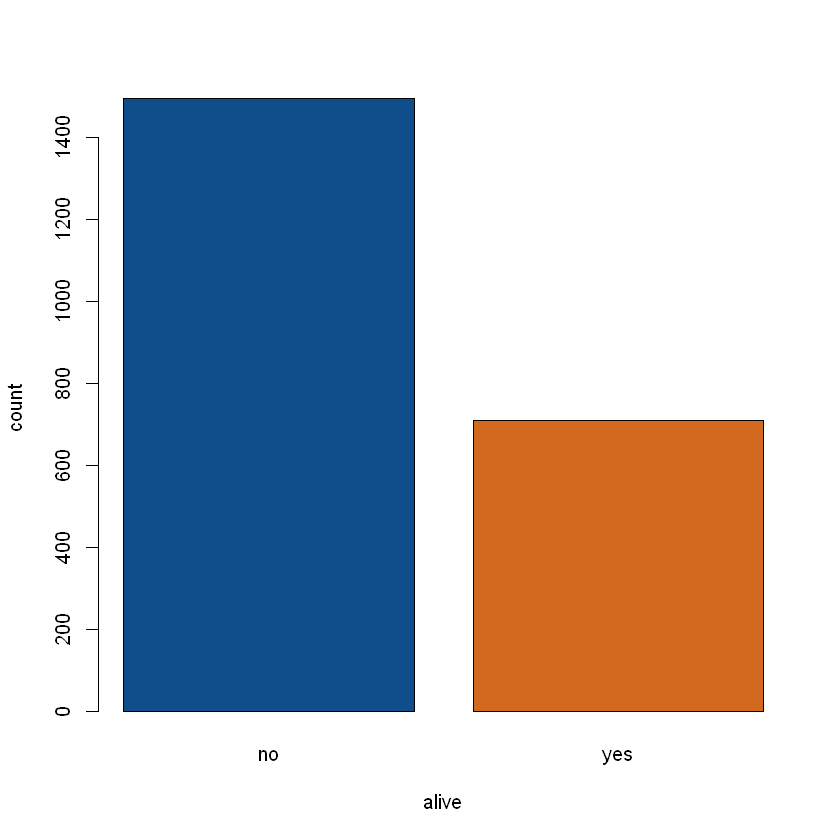

In [44]:
# Countplots in R: https://www.statmethods.net/graphs/bar.html
# Create counts from alive column
counts <- table(ti$survived)
barplot(counts, col=c("dodgerblue4", "chocolate"), xlab="alive", ylab="count")

                  
                    no yes
  deck crew         23  43
  engineering crew 253  71
  restaurant staff  66   3
  victualling crew 337  94

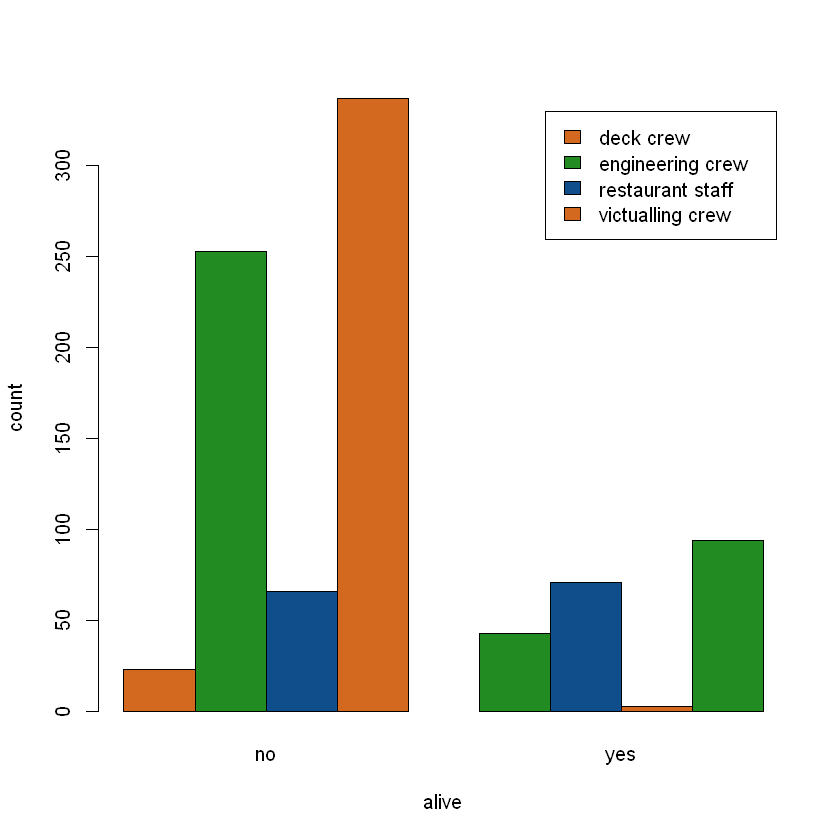

Warning message in min(x):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"Warning message in max(x):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"

ERROR: Error in plot.window(xlim, ylim, log = log, ...): endliche 'ylim' Werte nötig


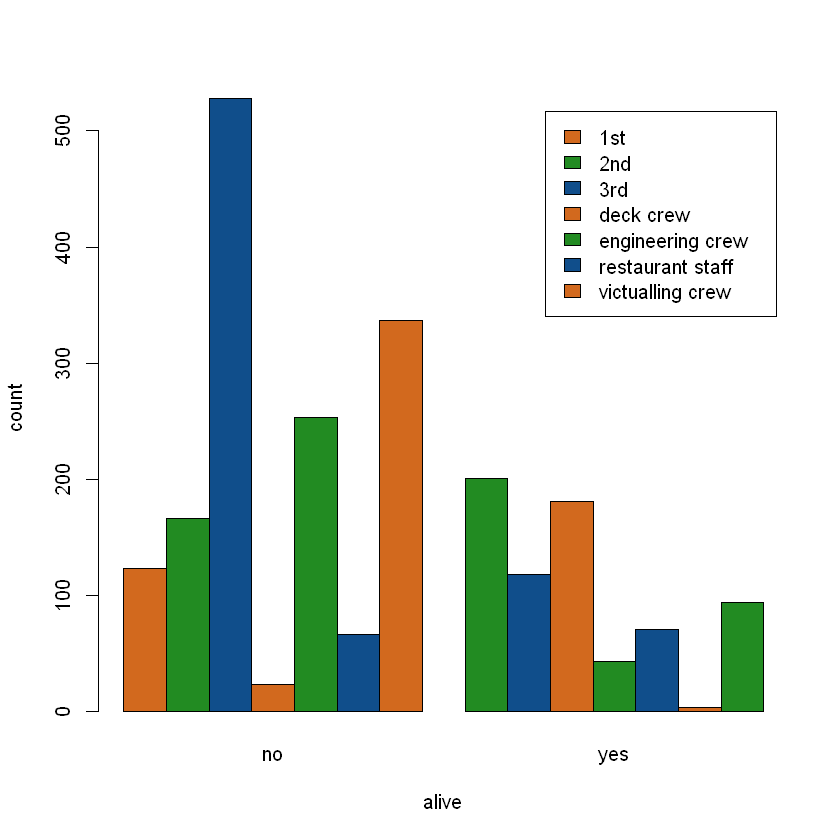

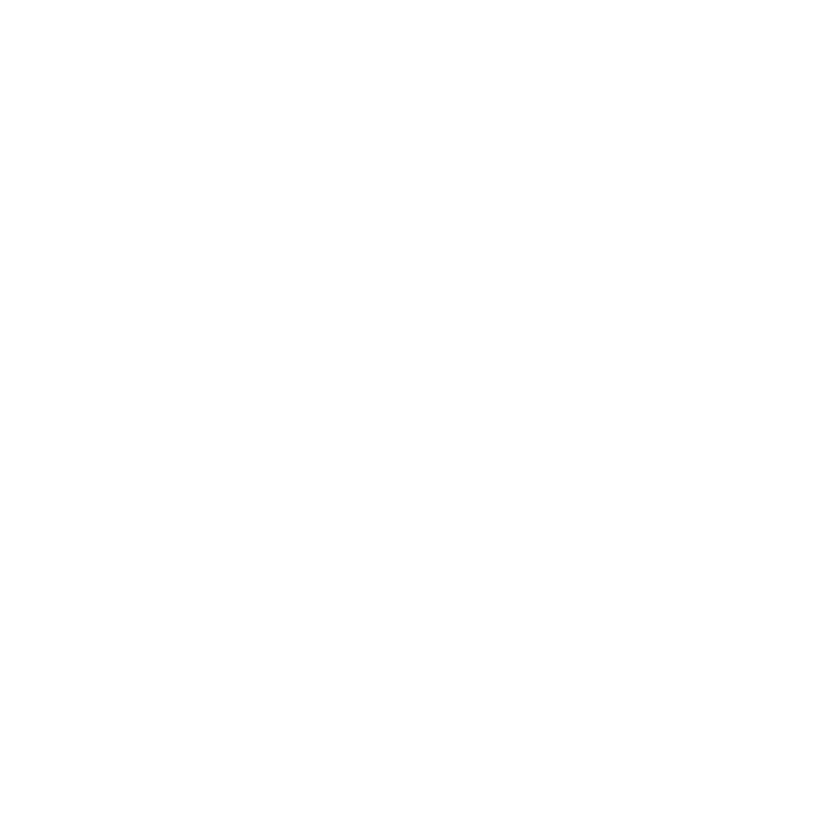

In [111]:
# Form a table with columns class and rows alive
counts <- table(ti$class[grepl("crew", ti$class) | grepl("staff", ti$class)],
                ti$survived[grepl("crew", ti$class) | grepl("staff", ti$class)])
# Delete unused rows
# Source: https://stackoverflow.com/questions/37307307/remove-a-row-from-a-data-table-in-r
counts <- counts[-1:-3,]
counts
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

counts <- table(ti$class, ti$survived)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

# Make a table from matrix 
# https://www.dummies.com/programming/r/how-to-create-a-two-way-data-table-with-r/
percentages <- matrix(c(
    length(ti$Pclass[ti$Pclass==1 & ti$Survived==0]) / length(ti$Pclass[ti$Pclass==1]),
    length(ti$Pclass[ti$Pclass==2 & ti$Survived==0]) / length(ti$Pclass[ti$Pclass==2]),
    length(ti$Pclass[ti$Pclass==3 & ti$Survived==0]) / length(ti$Pclass[ti$Pclass==3]),
    length(ti$Pclass[ti$Pclass==1 & ti$Survived==1]) / length(ti$Pclass[ti$Pclass==1]),
    length(ti$Pclass[ti$Pclass==2 & ti$Survived==1]) / length(ti$Pclass[ti$Pclass==2]),
    length(ti$Pclass[ti$Pclass==3 & ti$Survived==1]) / length(ti$Pclass[ti$Pclass==3])
), ncol=2)
colnames(percentages) <- c(0, 1)
rownames(percentages) <- c(1, 2, 3)
percentages <- as.table(percentages)

barplot(percentages, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(percentages), beside=TRUE, xlab="alive", ylab="percentage"
)

#### 4. Begründe anhand der quantitativen Ergebnisse, ob Frauen und Kinder zuerst bei der Seenotrettung berücksichtigt wurden.

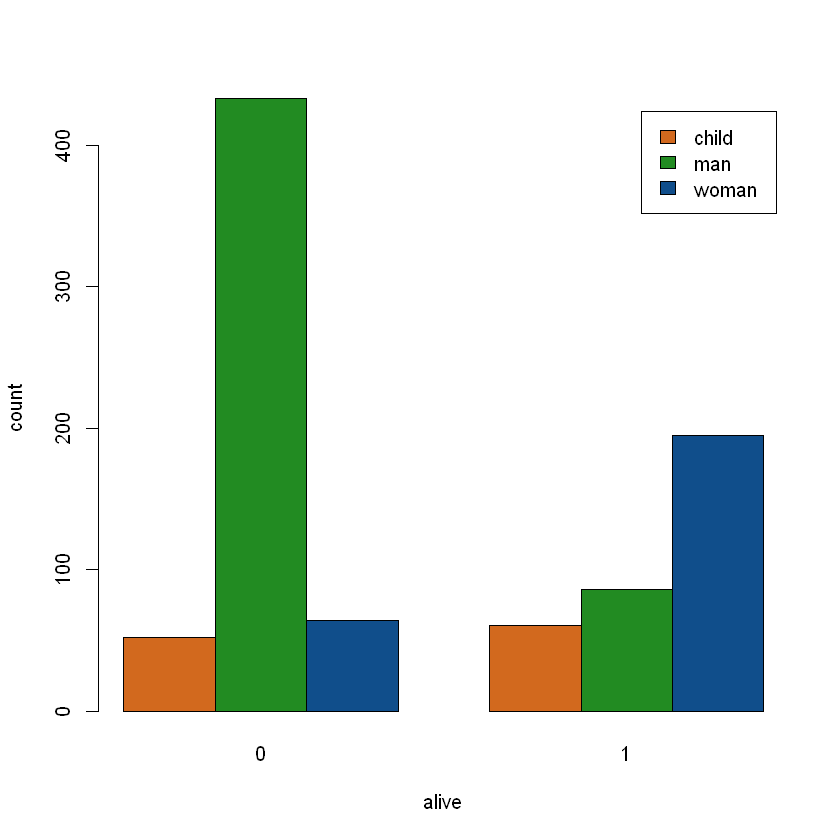

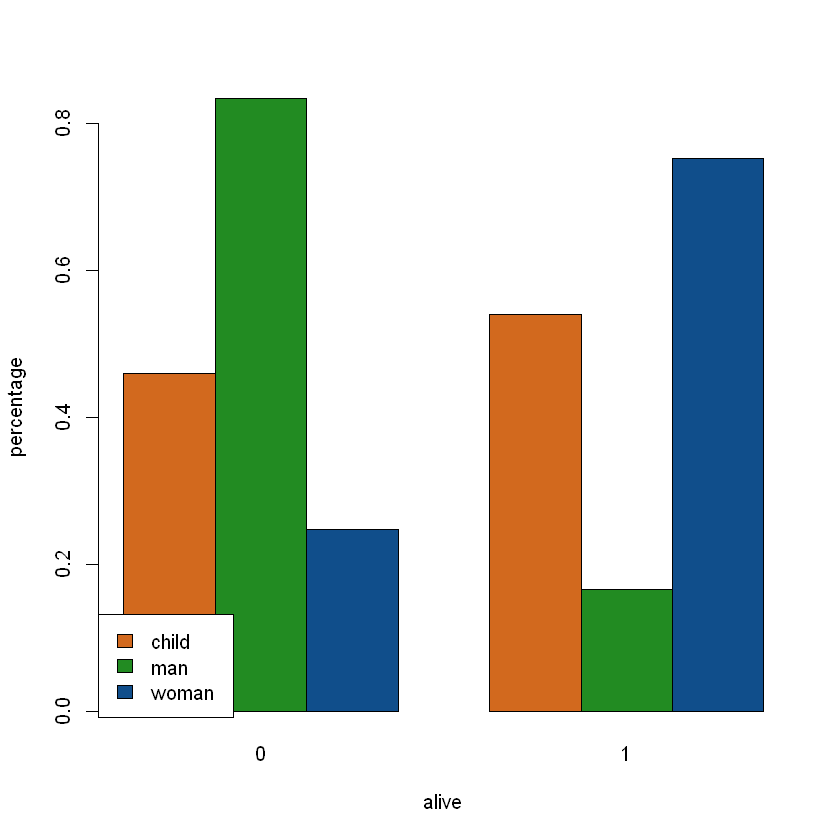

In [8]:
# Form a table with columns class and rows alive
counts <- table(ti$Who, ti$Survived)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

# Make a table from matrix 
# https://www.dummies.com/programming/r/how-to-create-a-two-way-data-table-with-r/
percentages <- matrix(c(
    length(ti$Who[ti$Who=="child" & ti$Survived==0]) / length(ti$Who[ti$Who=="child"]),
    length(ti$Who[ti$Who=="man" & ti$Survived==0]) / length(ti$Who[ti$Who=="man"]),
    length(ti$Who[ti$Who=="woman" & ti$Survived==0]) / length(ti$Who[ti$Who=="woman"]),
    length(ti$Who[ti$Who=="child" & ti$Survived==1]) / length(ti$Who[ti$Who=="child"]),
    length(ti$Who[ti$Who=="man" & ti$Survived==1]) / length(ti$Who[ti$Who=="man"]),
    length(ti$Who[ti$Who=="woman" & ti$Survived==1]) / length(ti$Who[ti$Who=="woman"])
), ncol=2)
colnames(percentages) <- c(0, 1)
rownames(percentages) <- c("child", "man", "woman")
percentages <- as.table(percentages)

barplot(percentages, col=c("chocolate", "forestgreen", "dodgerblue4"),
    beside=TRUE, xlab="alive", ylab="percentage"
)
legend("bottomleft", legend=rownames(percentages), fill=c("chocolate", "forestgreen", "dodgerblue4"))

In [9]:
Männer=Dead

ERROR: Error in eval(expr, envir, enclos): Objekt 'Dead' nicht gefunden


#### 5. Erkläre, wo sich Anzeichen für Simpson's Paradoxon finden lassen.

#### 6. Lade den Datensatz 'state.x77' in R. Beschreibe die Daten anhand der internen Hilfe.

In [ ]:
?state.x77

#### 7. Ermittle mithilfe geeigneter Schätzer für die Lage und Streuung der ersten 5 Variablen, Population, Income, Illiteracy, Life Exp(ectancy) und Murder.

In [ ]:
state.x77[,'Population']
state.x77[,'Income']
state.x77[,'Illiteracy']
state.x77[,'Life Exp']
state.x77[,'Murder']

#### 8. Stelle die Daten der ersten 5 Variablen, Population, Income, Illiteracy, Life Exp(ectancy) und Murder in geeigneter Weise graphisch dar. Verwende dafür wenigstens 2 unterschiedliche graphische Darstellungen.

#### 9. Begründe anhand der graphischen Darstellung, ob es sich symmetrische oder schiefe Datenverteilungen handelt. Begründe anhand der graphischen Darstellungen, ob schwere oder leichte Ränder vorliegen (und auf welcher Seite).

#### 10. Bestimme anhand graphischen Darstellungen aus Punkt 8. und der Erkenntnisse aus 9., ob Ausreißer vorliegen und welche Punkte dies sind.